In [2]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, GridSearchCV #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [3]:

from sklearn.metrics import roc_auc_score, auc, roc_curve, accuracy_score
from sklearn import neighbors
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE 

from collections import Counter

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

E:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
train = pd.read_csv("../Data/train.csv")
test = pd.read_csv("../Data/test.csv")

In [5]:
train = train.set_index('id')
test_pid=test.pop('id')

In [6]:
train_stage = train.copy()
test_stage = test.copy()

In [25]:
test_stage.head(10)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,age_cat,AGL_cat
0,1,0,0,1,1,1,21.1,2,9,0
1,0,0,1,1,2,0,26.0,2,9,2
2,0,0,0,0,0,0,21.2,0,1,0
3,1,0,0,0,1,1,23.4,0,2,0
4,0,0,0,1,1,0,27.6,0,7,0
5,0,1,0,1,1,1,32.2,0,7,2
6,0,0,0,1,2,0,25.1,0,5,0
7,1,0,0,1,1,1,32.5,0,4,0
8,0,0,0,1,2,0,28.0,0,9,0
9,1,0,0,1,2,1,25.7,1,9,0


In [8]:
combine = [train_stage, test_stage]

In [26]:
train_stage.describe()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,age_cat,AGL_cat
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43395.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,0.408894,0.093571,0.047512,0.643733,1.010599,0.501290,28.670033,0.496498,0.018041,4.053295,0.253733
std,0.492151,0.291235,0.212733,0.478901,0.549852,0.500004,7.681546,0.771558,0.133103,2.755085,0.639922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.100000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.400000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,27.980000,0.000000,0.000000,4.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,32.900000,1.000000,0.000000,6.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,97.600000,2.000000,1.000000,9.000000,2.000000


In [27]:
test_stage.describe()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,age_cat,AGL_cat
count,18601.000000,18601.000000,18601.000000,18601.000000,18601.000000,18601.000000,18600.000000,18601.000000,18601.000000,18601.000000
mean,0.411053,0.093167,0.048062,0.641847,1.009301,0.500511,28.617347,0.498737,4.034837,0.248965
std,0.492257,0.290674,0.213903,0.479470,0.546120,0.500013,7.673246,0.774951,2.759825,0.632372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.200000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.400000,0.000000,2.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,27.900000,0.000000,4.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,32.800000,1.000000,6.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,88.300000,2.000000,9.000000,2.000000


In [11]:
train_stage['age_Range']=pd.qcut(train_stage['age'],13)
train_stage.groupby(['age_Range'])['stroke'].mean().to_frame().style.background_gradient(cmap='summer_r')

,stroke
age_Range,
"(0.079, 7.0]",0.000286041
"(7.0, 16.0]",0.000280112
"(16.0, 22.0]",0.000336134
"(22.0, 29.0]",0.00027248
"(29.0, 35.0]",0.00187793
"(35.0, 41.0]",0.00464711
"(41.0, 46.0]",0.00761663
"(46.0, 51.0]",0.0110594
"(51.0, 56.0]",0.0140928


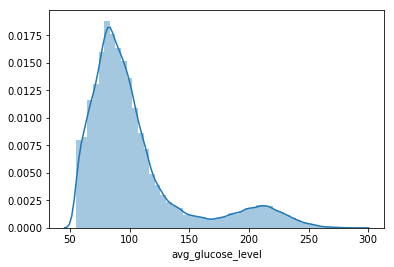

In [12]:
sns.distplot(train_stage.avg_glucose_level)

In [13]:
train_stage['AGL_Range']=pd.qcut(train_stage.loc[(train_stage['avg_glucose_level']>140),'avg_glucose_level'],8)
train_stage.groupby(['AGL_Range'])['stroke'].mean().to_frame().style.background_gradient(cmap='summer_r')

,stroke
AGL_Range,
"(140.029, 152.87]",0.0153649
"(152.87, 172.795]",0.0218509
"(172.795, 189.23]",0.0487805
"(189.23, 200.57]",0.0551282
"(200.57, 210.15]",0.0524968
"(210.15, 219.065]",0.0527671
"(219.065, 231.02]",0.0449294
"(231.02, 291.05]",0.0589744


In [14]:
for dataset in combine:
    dataset['age_cat']=0
    #train_stage.loc[train_stage['GrossIncome']<=3650,'GrossIncome_cat']=0
    dataset.loc[(dataset['age']>11)&(dataset['age']<=22),'age_cat']=1
    dataset.loc[(dataset['age']>22)&(dataset['age']<=31),'age_cat']=2
    dataset.loc[(dataset['age']>31)&(dataset['age']<=40),'age_cat']=3
    dataset.loc[(dataset['age']>40)&(dataset['age']<=47),'age_cat']=4
    dataset.loc[(dataset['age']>47)&(dataset['age']<=54),'age_cat']=5
    dataset.loc[(dataset['age']>54)&(dataset['age']<=62),'age_cat']=6
    dataset.loc[(dataset['age']>62)&(dataset['age']<=72),'age_cat']=7
    dataset.loc[(dataset['age']>72),'age_cat']=9
    
    dataset['AGL_cat']=0
    dataset.loc[(dataset['avg_glucose_level']>140)&(dataset['avg_glucose_level']<=170),'AGL_cat']=1
    dataset.loc[(dataset['avg_glucose_level']>170),'AGL_cat']=2    

train_stage = train_stage.drop(['age_Range','age'], axis=1)
test_stage = test_stage.drop(['age'], axis=1)

train_stage = train_stage.drop(['AGL_Range','avg_glucose_level'], axis=1)
test_stage = test_stage.drop(['avg_glucose_level'], axis=1)

In [15]:
train_stage.pivot_table(index = ['age_cat','AGL_cat'], values = 'stroke', aggfunc=np.mean)

stroke
age_cat AGL_cat          
0       0        0.000211
        1        0.000000
        2        0.000000
1       0        0.000413
        1        0.000000
        2        0.000000
2       0        0.000223
        1        0.000000
        2        0.000000
3       0        0.004031
        1        0.000000
        2        0.010453
4       0        0.005661
        1        0.013699
        2        0.015190
5       0        0.011019
        1        0.019608
        2        0.023529
6       0        0.016975
        1        0.019704
        2        0.043944
7       0        0.030138
        1        0.023810
        2        0.068611
9       0        0.076615
        1        0.087838
        2        0.094931

In [16]:
train_stage['smoking_status'].fillna('never smoked',inplace = True)
test_stage['smoking_status'].fillna('never smoked',inplace = True)

In [17]:
cat_var=train_stage.select_dtypes(include = ['object']).columns
for var in cat_var :
    if(var not in ['stroke']):
        print(var)
        print(train_stage[var].unique())
        print(test_stage[var].unique())

gender
['Male' 'Female' 'Other']
['Male' 'Female' 'Other']
ever_married
['No' 'Yes']
['Yes' 'No']
work_type
['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
['Private' 'Self-employed' 'children' 'Govt_job' 'Never_worked']
Residence_type
['Rural' 'Urban']
['Urban' 'Rural']
smoking_status
['never smoked' 'formerly smoked' 'smokes']
['formerly smoked' 'never smoked' 'smokes']


In [18]:
train_stage.pivot_table(index = ['work_type'], values = 'stroke', aggfunc=np.mean)

,stroke
work_type,
Govt_job,0.016360
Never_worked,0.000000
Private,0.017758
Self-employed,0.036950
children,0.000325


In [19]:
train_stage.pivot_table(index = ['smoking_status'], values = 'stroke', aggfunc=np.mean)

,stroke
smoking_status,
formerly smoked,0.029494
never smoked,0.014619
smokes,0.020268


In [20]:
train_stage['gender'].replace(['Male','Female', 'Other'],[2,1,0],inplace=True)
train_stage['ever_married'].replace(['No','Yes'],[0,1],inplace=True)
train_stage['work_type'].replace(['children','Never_worked','Self-employed','Private', 'Govt_job'],[0,0,2,1,1],inplace=True)
train_stage['Residence_type'].replace(['Rural','Urban'],[0,1],inplace=True)
train_stage['smoking_status'].replace(['never smoked','formerly smoked','smokes'],[0,2,1],inplace=True)

test_stage['gender'].replace(['Male','Female', 'Other'],[1,0,2],inplace=True)
test_stage['ever_married'].replace(['No','Yes'],[0,1],inplace=True)
test_stage['work_type'].replace(['children','Never_worked','Self-employed','Private', 'Govt_job'],[0,0,2,1,1],inplace=True)
test_stage['Residence_type'].replace(['Rural','Urban'],[0,1],inplace=True)
test_stage['smoking_status'].replace(['never smoked','formerly smoked','smokes'],[0,2,1],inplace=True)

In [22]:
table = train_stage.pivot_table(index = ['work_type','age_cat','hypertension','smoking_status','AGL_cat'], values = 'bmi', aggfunc=np.mean)
print(table)

                                                             bmi
work_type age_cat hypertension smoking_status AGL_cat           
0         0       0            0              0        19.070984
                                              1        18.800000
                                              2        20.070909
                               1              0        20.300000
                               2              0        21.680000
                                              1        16.566667
                                              2        21.700000
                  1            0              0        36.100000
          1       0            0              0        23.489422
                                              1        23.786111
                                              2        22.434783
                               1              0        24.480000
                                              2        25.033333
                         

In [23]:
def fill(x):
    if pd.isnull(x['bmi']):
        return table.loc[x['work_type'],x['age_cat'],x['hypertension'],x['smoking_status'],x['AGL_cat']].values
    else:
        return x['bmi']

In [24]:
train_stage['bmi'] = train_stage.apply(lambda x : round(float(fill(x)),2),axis=1)
test_stage['bmi'] = test_stage.apply(lambda x : round(float(fill(x)),2),axis=1)

In [28]:
train_stage['bmi'].fillna(train_stage['bmi'].mean(),inplace = True)
test_stage['bmi'].fillna(train_stage['bmi'].mean(),inplace = True)

bmi


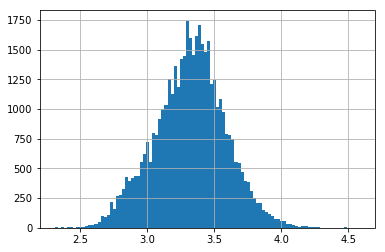

In [31]:
for column in ['bmi']:
    print(column)
    #np.log(train_stage[column]).hist(bins = 100)
    np.log(train_stage[column]).hist(bins=100)
    plt.show()

In [32]:
train_stage['log_bmi'] = np.log(train_stage['bmi'])
test_stage['log_bmi'] = np.log(test_stage['bmi'])

train_stage = train_stage.drop(['bmi'], axis=1)
test_stage = test_stage.drop(['bmi'], axis=1)

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(train_stage[train_stage['stroke']==0].bmi,ax=ax[0])
ax[0].set_title('no stroke')
sns.distplot(train_stage[train_stage['stroke']==1].bmi,ax=ax[1])
ax[1].set_title('stroke')
plt.show()

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(train_stage[train_stage['stroke']==0].avg_glucose_level,ax=ax[0])
ax[0].set_title('no stroke')
sns.distplot(train_stage[train_stage['stroke']==1].avg_glucose_level,ax=ax[1])
ax[1].set_title('stroke')
plt.show()

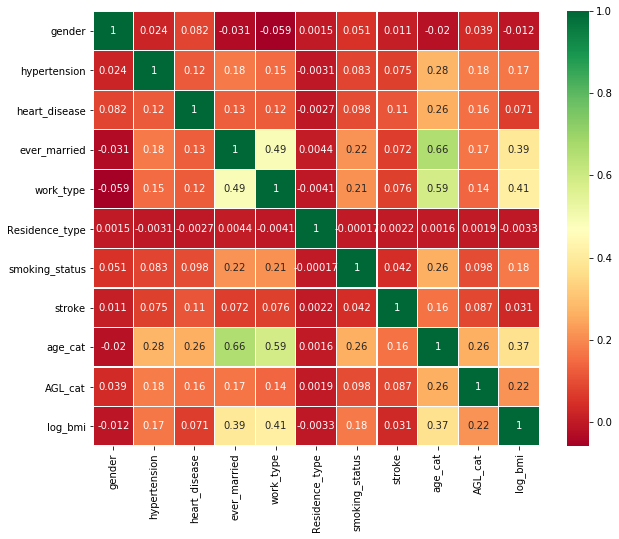

In [33]:
sns.heatmap(train_stage.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [34]:
y=train_stage['stroke']
X = train_stage.drop('stroke', axis=1)

In [ ]:
X.info()

In [35]:
sm = SMOTE(random_state=21)

In [36]:
X_resampled, y_resampled = sm.fit_sample(X, y)

In [37]:
X_resampled = pd.DataFrame(X_resampled)

In [38]:
X_resampled.columns = X.columns

In [39]:
print(X.shape)
print(y.shape)
print(X_resampled.shape)
print(y_resampled.shape)

(43400, 10)
(43400,)
(85234, 10)
(85234,)


In [84]:
np.sum(y)

783

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42, stratify=y_resampled)

In [41]:
model_rfc= RandomForestClassifier()

In [42]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
predicted= model_rfc.predict_proba(X_test)

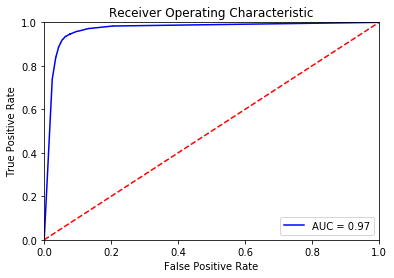

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, predicted[:,1], pos_label=1)
auc_algo = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_algo)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Index(['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'age_cat', 'AGL_cat', 'log_bmi'],
      dtype='object')


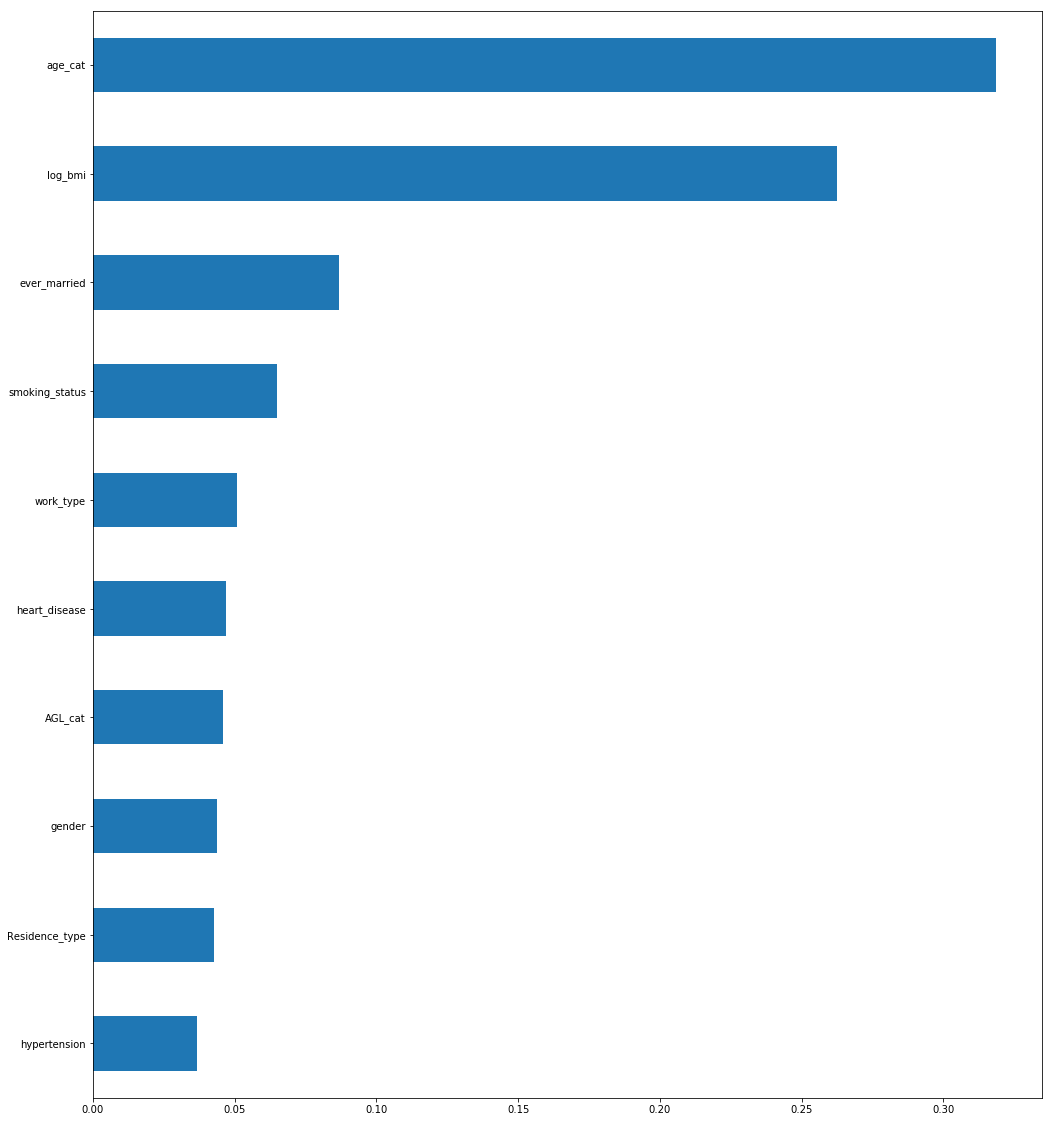

In [45]:
feature_importance = pd.Series(model_rfc.feature_importances_, index=X.columns)
columns = feature_importance[feature_importance > 0.0025].index
print(columns)
feature_importance.sort_values(inplace=True)
feature_importance.plot(kind='barh',figsize=(17,20));
plt.show()

In [46]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=6,
 gamma=0.09,
 reg_alpha = 1,
 subsample=0.8,
 colsample_bytree=0.7,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [47]:
xgb2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.7,
       gamma=0.09, learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=6, missing=None, n_estimators=1000, nthread=4,
       objective='binary:logistic', reg_alpha=1, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.8)

In [48]:
cv_score = cross_val_score(xgb2,X_resampled,y_resampled,cv = 10, scoring = 'roc_auc')
print(cv_score)

[ 0.96981502  0.99859912  0.99908446  0.99894014  0.99858456  0.99842777
  0.99889073  0.99859367  0.99857726  0.99832293]


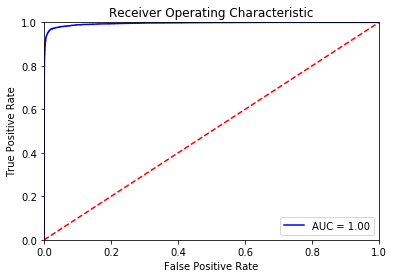

In [49]:
y_predict = xgb2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_predict[:,1], pos_label=1)
auc_algo = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_algo)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
xgb2.fit(X_resampled, y_resampled)

_pred = xgb2.predict_proba(test_stage)

pred_reSample_xgb2 = pd.DataFrame(_pred[:,1],columns=['stroke'])

Prediction = pd.concat([test_pid,pred_reSample_xgb2], axis=1 )
Prediction.to_csv('../Submissions/Submission9.csv',sep=',',index =False)